# Diabetes Prediction with Logistic Regression 

#### Dataset Link
 https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset?datasetId=3102947

## <font color='red'>**Problematic**</font>

The prevalence of diabetes is increasing worldwide, and early detection of diabetes is crucial for the management and prevention of complications. However, awaerness and early detection is often challenging, and there is a need for accurate and reliable diagnostic tools that can predict the likelihood of developing diabetes.

## <font color='red'>**Project Goal**</font>

To develop a machine learning model that can accurately predict the likelihood of developing diabetes based on a set of patient features, such as age, BMI, blood pressure, and glucose levels. This model can be used as a diagnostic tool by healthcare professionals to identify patients at risk of developing diabetes and provide timely interventions to prevent or manage the condition. Ultimately, the goal is to improve patient outcomes and reduce the burden of diabetes on healthcare systems.

## <font color='red'>**Machine Learning Model**</font>

I choose <font color='blue'>**logistic regression**</font> for this project because it is a commonly used classification algorithm that is well-suited for *binary classification* problems like the one we are trying to solve, where we are predicting whether a patient has diabetes or not. Logistic regression is a simple yet powerful algorithm that produces interpretable results and can handle both linear and nonlinear relationships between the features and the target variable. It also works well with small to medium-sized datasets, which is the case for this project. Moreover, logistic regression can be easily implemented and optimized, and its coefficients can provide insights into the relative importance of each feature in predicting the target variable. For these reasons, logistic regression is a good choice for developing a diabetes prediction model.



## Importing the required librairies

In [254]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pickle 
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


## Loading the dataset 

In [197]:
data = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [198]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


 ## Exploratory Data Analysis (EDA)

The first step in creating an efficient Machine Learning model is to perform exploratory data analysis (EDA), this step is crucial to gain a better understanding of the dataset and identify any issues or limitations that may affect the model's performance. 

EDA involves examining the distribution and range of the variables, identifying missing values and outliers, and exploring the relationships between variables. This step is important because it helps us to identify any potential problems with the data and to determine which variables are most relevant for predicting the target variable. 

In [199]:
# How many columns and rows? 
print('The dataset contains', data.shape[0],'and ', data.shape[1], 'columns')

The dataset contains 100000 and  9 columns


In [200]:
# Checking the columns data types
data.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

The dataset contains 100k rows, and 9 columns which are represented as strings in the "object" format, integers in the "int64" format, and floating-point numbers in the "float64" format. Here is a brief interpretation of each variable:

**gender**: categorical feature that represents the gender of the patient (either "Male" or "Female").

**age**: numerical feature that represents the age of the patient in years (a continuous variable).

**hypertension**: the data type is numerical represents whether the patient has hypertension or not (0 = no, 1 = yes), therefore we can transform it into categorical later.

**heart_disease**: numercical data represents whether the patient has a heart disease or not (0 = no, 1 = yes), should be tranformed into categorical.

**smoking_history**: categorical data, represents the smoking history of the patient (either "formerly smoked", "never smoked", "smokes", or "unknown").

**bmi**: numerical feature represents the body mass index of the patient (a continuous variable).

**HbA1c_level**: represents the HbA1c level of the patient (a continuous variable).
**blood_glucose_level**: numerical feature represents the blood glucose level of the patient (a continuous variable).

**diabetes**: this is the <font color='red'>**target variable**</font> which  represents whether the patient has diabetes or not (0 = no, 1 = yes). As shown on the output above the column data type is numerical and we should transform it into categorical data. 


#### Converting numerical columns to categories (binary) 

We will change the data type of the columns **hypertension**, **heart_disease** and  **diabetes** from numerical to object (binary data)**bold text** 

In [201]:
#Specify the columns that we want to covert
cat_cols = ["hypertension","heart_disease","diabetes" ]

# Converting numerical columuns stored in the variable cat_cols to category
data[cat_cols] = data[cat_cols].astype("category")

In [202]:
#checking the data type again 
data[cat_cols].dtypes

hypertension     category
heart_disease    category
diabetes         category
dtype: object

In [203]:
#Checking for null values
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Luckily our dataset has 0 missing value <3 

### Descriptive statistics

In [204]:
data.describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,27.320767,5.527507,138.058060
std,22.516840,6.636783,1.070672,40.708136
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.630000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,60.000000,29.580000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


**Age**: The patients in the dataset range in age from 0.08 😆 to 80 years old, with a mean age of approximately 42 years old and a standard deviation of approximately 23 years old. (I should check min values in age )

**BMI**: The body mass index (BMI) of the patients ranges from 10.01 to 95.69, with a mean BMI of approximately 27.3 and a standard deviation of approximately 6.6. The BMI distribution is likely to be right-skewed.(we will get more insight with some visualisation)

**HbA1c_level**: The HbA1c level of the patients ranges from 3.5 to 9, with a mean level of approximately 5.5 and a standard deviation of approximately 1.1.

**Blood_glucose_level**: The blood glucose level of the patients ranges from 80 to 300, with a mean level of approximately 138 and a standard deviation of approximately 40.7.

<font color='red'>**Note 1**</font>: Age of 0.08 is not a realistic value and it could be an error in data entry or data collection. It is important to investigate this value further and decide how to handle it. In some cases, it may be appropriate to remove this row from the dataset, or impute the missing or erroneous value with a more reasonable value, such as the mean or median age.
I will check this later when handling outliers. 

<font color='red'>**Note 2**</font>: When looking at the output of '''data.describe()''', I should compare the standard deviation (std) with the mean. If the std is much smaller than the mean, then the data points tend to be closer to the mean, indicating low variance in the data. On the other hand, if the std is much larger than the mean, then the data points tend to be more spread out, indicating high variance in the data. In the case of the BMI variable, the standard deviation is 6.63 and the mean is 27.32, which means that the data points are spread out but not too far from the mean.

<font color='red'>**Note 3**</font>: The min and max values in the dataset provide information about the range of the data.The weight of these values on the data depends on the specific analysis being performed. In some cases, the minimum and maximum values may be important outliers that need to be investigated further. In other cases, the range of the data may not be particularly informative, and other statistics such as the mean and standard deviation may be more relevant.

<font color='red'>**Note 4**</font>: 
The 25th, 50th (median), and 75th percentiles divide the data into four equal parts, where each part contains 25% of the data. The 50th percentile (median) represents the middle value of the dataset. The 25th and 75th percentiles represent the data points at one quarter and three-quarters of the way through the dataset, respectively. **These percentiles can be useful for understanding the distribution of the data and identifying any outliers**. 
The percentiles can be useful for identifying *outliers* in the data or for understanding the distribution of the data. For example, if the difference between the 75th percentile and the maximum value is large, it could indicate the presence of outliers in the upper range of the data. On the other hand, if the difference between the 25th percentile and the minimum value is large, it could indicate the presence of outliers in the lower range of the data.



### Frequency tables

In [205]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [206]:
# Generate frequency distribution for categorical variable
print(data['hypertension'].value_counts(),"\n")
print(data['heart_disease'].value_counts(),"\n")
print(data['smoking_history'].value_counts(),"\n")
print(data['gender'].value_counts(),"\n")
print(data['diabetes'].value_counts())

0    92515
1     7485
Name: hypertension, dtype: int64 

0    96058
1     3942
Name: heart_disease, dtype: int64 

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64 

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64 

0    91500
1     8500
Name: diabetes, dtype: int64


The output above shows the count of unique values for each of the categorical variables in the dataset. It seems like hypertension, heart disease, and diabetes are relatively common among the individuals in the dataset. 

Regarding the target variable "diabetes",  there is no class imbalance in the diabetes column as both the 0 and 1 values have a sizable number of occurrences (91500 and 8500, respectively). 


In [207]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("Hypertension", "Heart Disease", "Smoking History", "Diabetes"))

fig.add_trace(go.Bar(x=data['hypertension'].value_counts().index, y=data['hypertension'].value_counts().values), row=1, col=1)
fig.add_trace(go.Bar(x=data['heart_disease'].value_counts().index, y=data['heart_disease'].value_counts().values), row=1, col=2)
fig.add_trace(go.Bar(x=data['smoking_history'].value_counts().index, y=data['smoking_history'].value_counts().values), row=2, col=1)
fig.add_trace(go.Bar(x=data['diabetes'].value_counts().index, y=data['diabetes'].value_counts().values), row=2, col=2)

fig.update_layout(
    title={
        'text': "Categorical Columns Distribution",
        'x': 0.5,
        'xanchor': 'center'
    },
    height=800, 
    width=1000
)

fig.show()


### Data Distrubution

<Axes: xlabel='bmi', ylabel='Count'>

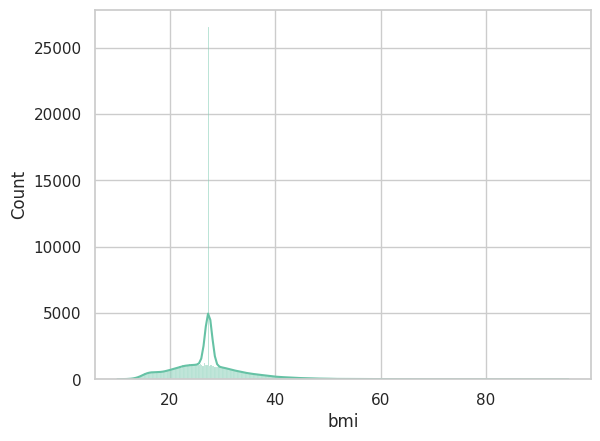

In [208]:
sns.histplot(data['bmi'], kde=True)

Since the range of the BMI values is much smaller than the count of individuals in each BMI category, the bars will appear relatively thin compared to the bars in the count plot. One way to address this issue is to normalize the values in the BMI column so that they are on the same scale as the count values. This can be done using various techniques such as min-max scaling or z-score normalization. Another approach is to plot the BMI distribution as a separate histogram plot instead of a stacked bar plot, which may provide a better visual representation of the distribution.

In [209]:
fig = px.histogram(data, x="bmi", nbins=30)
fig.update_layout(title="BMI Distribution", xaxis_title="BMI", yaxis_title="Count")
fig.show()


The distribution of BMI values is slightlt skewed to the right. This means that most people have a BMI that falls within the lower range, with fewer people having a higher BMI.the peak of the histogram is around 25, which is considered to be within the normal weight range according to the BMI classification system. However, there is a long tail to the right, indicating that there are a significant number of people who fall outside the normal weight range and have higher BMIs.

In [210]:
print(data['gender'].value_counts(),"\n")

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64 



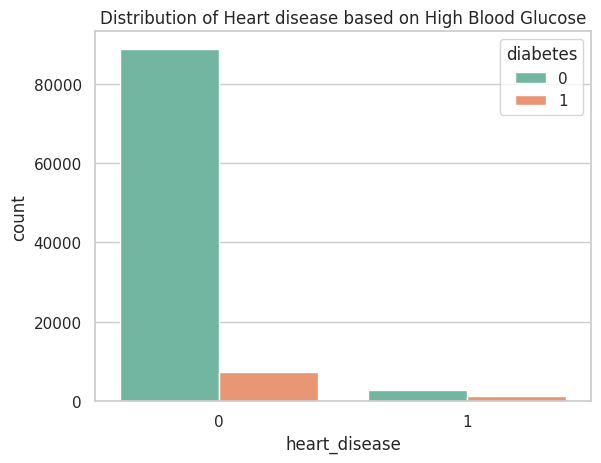

In [238]:
sns.countplot(x='heart_disease', hue='diabetes', data=data, palette='Set2')
plt.title("Distribution of Heart disease based on High Blood Glucose")
plt.show()


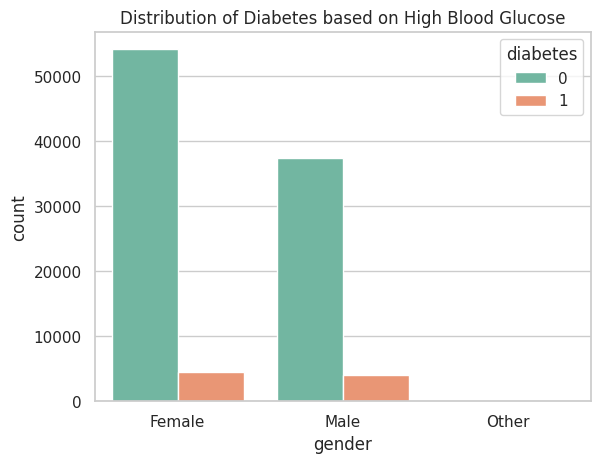

In [211]:
sns.countplot(x='gender', hue='diabetes', data=data, palette='Set2')
plt.title("Distribution of Diabetes based on High Blood Glucose")
plt.show()


In [212]:
data[data['gender'] == 'Other']

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
12669,Other,10.0,0,0,not current,14.09,5.0,140,0
14838,Other,19.0,0,0,No Info,27.32,5.7,158,0
16702,Other,39.0,0,0,not current,31.24,6.2,85,0
18691,Other,10.0,0,0,not current,16.59,6.1,160,0
23266,Other,23.0,0,0,No Info,24.23,6.1,140,0
31985,Other,53.0,0,0,No Info,27.32,6.6,160,0
33805,Other,45.0,0,0,never,27.32,4.0,159,0
34929,Other,47.0,0,0,never,36.76,6.6,90,0
35006,Other,47.0,0,0,never,36.76,3.5,200,0
40337,Other,18.0,0,0,not current,30.19,6.1,90,0


<font color='red'>**Note:**</font> I noticed that rows that have "other" in the gender are not significant therfore i have removed the 18 rows. 

In [213]:
data = data[data['gender'] != 'Other']


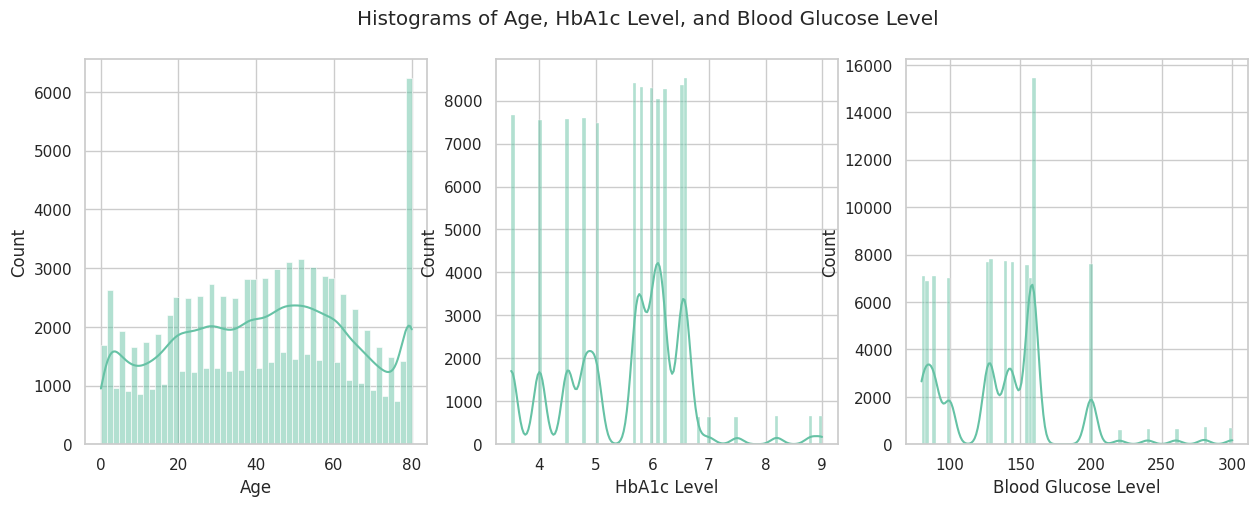

In [214]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
sns.histplot(data['age'], kde=True, ax=axs[0])
sns.histplot(data['HbA1c_level'], kde=True, ax=axs[1])
sns.histplot(data['blood_glucose_level'], kde=True, ax=axs[2])

axs[0].set_xlabel('Age')
axs[1].set_xlabel('HbA1c Level')
axs[2].set_xlabel('Blood Glucose Level')

fig.suptitle('Histograms of Age, HbA1c Level, and Blood Glucose Level')
plt.show()



 

The age graph shows a fairly **normal distribution**, with a peak around 50 years old and a tail towards older ages.

The HbA1c level graph shows a **bimodal distribution**, with peaks around 5.5 and 8.0, indicating that there may be two distinct subpopulations with different levels of HbA1c.

The blood glucose level graph also shows a **bimodal distribution**, with peaks around 80 and 180 mg/dL, which may indicate the presence of two subpopulations with different levels of blood glucose.


#### Feature Engineering

Looking on the graph above, i noticed the for the features **high_glucose**, **bmi** and  **high_HbA1c** can be categorized.

I did some research and i found out that bmi can be splited into 3 categories:

BMI < 18.5: Underweight

*   BMI < 18.5: Underweight
*   18.5 <= BMI < 25: Normal weight
*   BMI >= 25: Overweight/Obese

Regarding the HbA1c:

*   Normal HbA1c: less than 5.7%
*   Pre-diabetes: 5.7% to 6.4%
*   Diabetes: 6.5% or higher


About high_glucose >  200mg/dl: 
(*in the USA, the unit used for blood glucose level is typically mg/dL*)

I created a new column called "high_glucose" that takes on the value 1 if the blood glucose level is greater than a certain threshold (e.g. 200), and 0 otherwise. 


##### BMI Categories

In [215]:
# Creating a new column "bmi_category"
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi >= 18.5 and bmi < 25:
        return 'Normal weight'
    elif bmi >= 25 and bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

data['bmi_category'] = data['bmi'].apply(categorize_bmi)

In [216]:
data.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_category
0,Female,80.0,0,1,never,25.19,6.6,140,0,Overweight
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Overweight
2,Male,28.0,0,0,never,27.32,5.7,158,0,Overweight


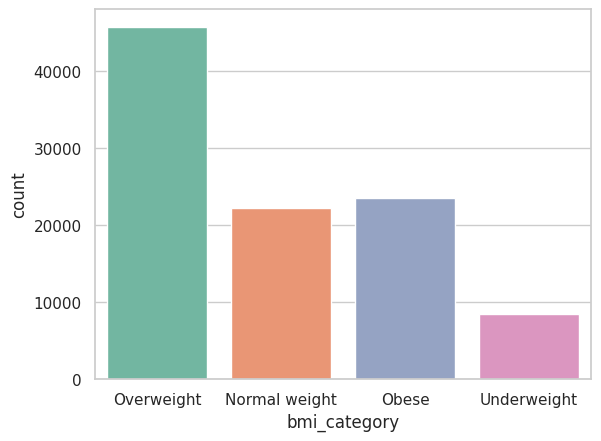

In [217]:
# Visualize the distribution of "bmi_category"
sns.countplot(x='bmi_category', data=data, palette='Set2')
plt.show()

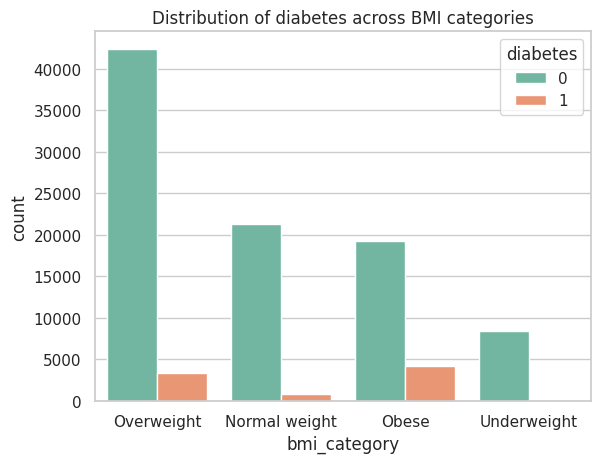

In [218]:
sns.set(style='whitegrid', palette='Set2')

# create a countplot
sns.countplot(x='bmi_category', hue='diabetes', data=data)

# set title
plt.gca().set_title('Distribution of diabetes across BMI categories')

plt.show()

Looking at the graph above, it appears that there is a higher prevalence of diabetes among individuals who fall into the **"obese"** and **"overweight"** categories as compared to those in the "normal weight" and "underweight" categories

This is because excess weight can lead to insulin resistance, a condition in which the body does not effectively use insulin to regulate blood sugar levels. As a result, the pancreas may need to produce more insulin to keep blood sugar levels in check, which can lead to elevated blood sugar levels over time and ultimately, the development of type 2 diabetes.

#### Hemoglobin A1C class

In [219]:
# Create class intervals for HbA1c_level feature
hbca_bins = [0, 5, 6, 7, 8, 9]
hbca_labels = ['<5', '5-6', '6-7', '7-8', '8-9']
data['hbca_class'] = pd.cut(data['HbA1c_level'], bins=hbca_bins, labels=hbca_labels)


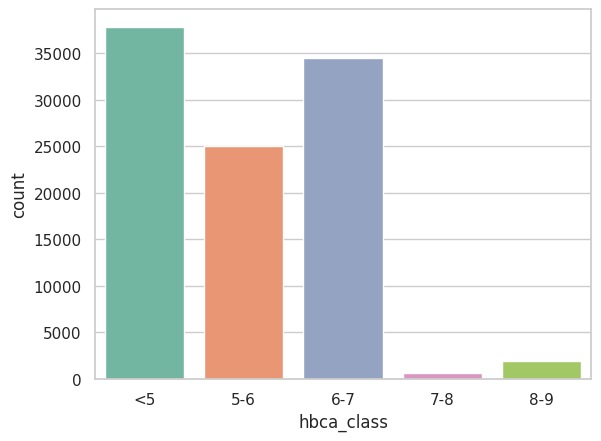

In [220]:
# Visualize the distribution of "bmi_category"
sns.countplot(x='hbca_class', data=data, palette='Set2')
plt.show()

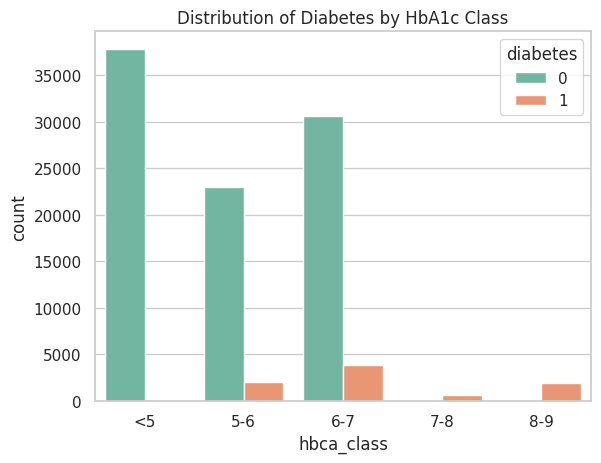

In [221]:
sns.countplot(x='hbca_class', hue='diabetes', data=data, palette='Set2')
plt.title('Distribution of Diabetes by HbA1c Class')
plt.show()

Based on the analysis of **"hbca_class"**, it seems like there is a clear correlation between higher HbA1c levels and diabetes. All individuals with an HbA1c level of 7 or above had diabetes. This suggests that HbA1c may be a useful indicator for predicting diabetes risk. 

<font color='red'>**Note:**</font> it's important to keep in mind that correlation does not necessarily equal causation, and further analysis and studies would be needed to confirm this relationship.

#### Glucose level in blood

In [222]:
data['high_glucose'] = data['blood_glucose_level'].apply(lambda x: 1 if x > 200 else 0)


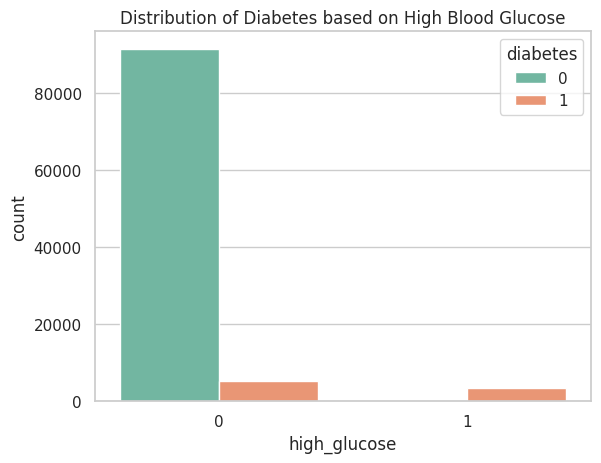

In [223]:
sns.countplot(x='high_glucose', hue='diabetes', data=data, palette='Set2')
plt.title("Distribution of Diabetes based on High Blood Glucose")
plt.show()


it seems that individuals with high glucose levels (>200 mg/dL) have a higher likelihood of having diabetes compared to those with lower glucose levels. This is supported by the observation that all individuals in the dataset with a glucose level greater than 200 mg/dL also have diabetes.

### Checking for outliers 

One way to check for outliers in numerical columns is to use boxplots. In a boxplot, the central box represents the middle 50% of the data (the interquartile range or IQR), with the median line inside the box. The whiskers extend to the most extreme data points that are not considered outliers (1.5 times the IQR away from the box), and individual points beyond the whiskers are considered outliers.

<Axes: xlabel='blood_glucose_level'>

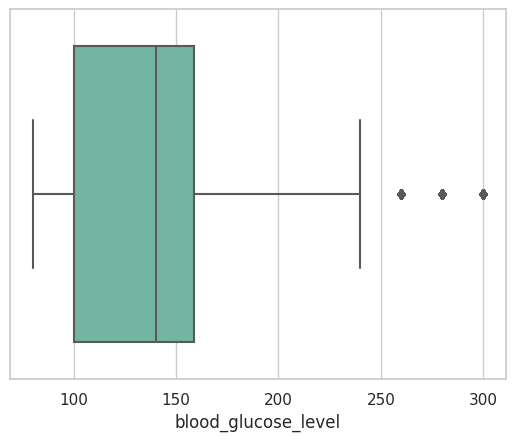

In [224]:
sns.boxplot(x=data['blood_glucose_level'])

In [225]:
# Calculate the upper and lower bounds of the boxplot
q1, q3 = np.percentile(data['blood_glucose_level'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Count the number of outliers
outliers = data[(data['blood_glucose_level'] < lower_bound) | (data['blood_glucose_level'] > upper_bound)]
num_outliers = len(outliers)

# Print the number of outliers
print(f'Number of outliers: {num_outliers}')

Number of outliers: 2038


<Axes: >

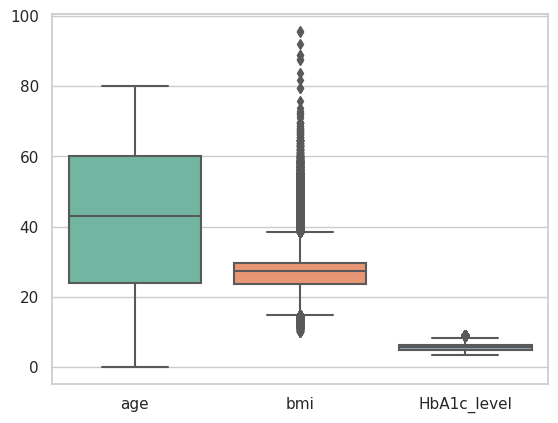

In [226]:
# Select columns to visualize
cols = ['age', 'bmi', 'HbA1c_level']

# Create a boxplot for each column in the same figure
sns.boxplot(data=data[cols])

### Checking for correlation 

In [227]:
data.dtypes

gender                   object
age                     float64
hypertension           category
heart_disease          category
smoking_history          object
bmi                     float64
HbA1c_level             float64
blood_glucose_level       int64
diabetes               category
bmi_category             object
hbca_class             category
high_glucose              int64
dtype: object

In [228]:
corr_matrix = data.corr()
corr_matrix


<ipython-input-228-b20f780b4413>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,bmi,HbA1c_level,blood_glucose_level,high_glucose
age,1.000000,0.337378,0.101343,0.110679,0.158363
bmi,0.337378,1.000000,0.083017,0.091310,0.129639
HbA1c_level,0.101343,0.083017,1.000000,0.166831,0.240046
blood_glucose_level,0.110679,0.091310,0.166831,1.000000,0.557895
high_glucose,0.158363,0.129639,0.240046,0.557895,1.000000


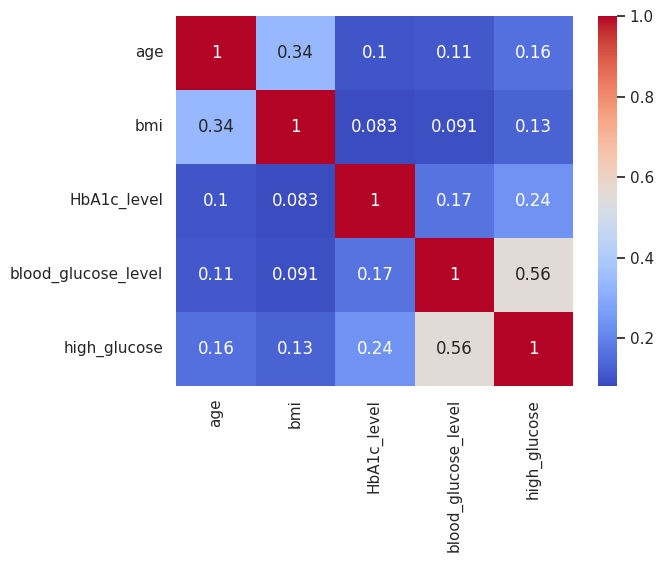

In [229]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


It seems that there are positive correlations between **age**, **BMI**, **HbA1c level**, and **blood glucose level** with high glucose. The correlation coefficients are not very high, but they are statistically significant. This suggests that these factors may be important in predicting high glucose levels and the development of diabetes.

<font color='red'>**Note**</font>: The correlation does not imply causation. Other factors, such as genetics and lifestyle habits, may also play a role in the development of diabetes. 

In [230]:
data.dtypes

gender                   object
age                     float64
hypertension           category
heart_disease          category
smoking_history          object
bmi                     float64
HbA1c_level             float64
blood_glucose_level       int64
diabetes               category
bmi_category             object
hbca_class             category
high_glucose              int64
dtype: object

### Data Encoding 

I want to check correlation between the features and the target column **"diabetes"**, i should first encode the categorical columns, using using one-hot encoding or label encoding:

<font color='red'>**Label encoding**</font> can be used when the categorical variable is ordinal, and the order matters. For example, the **hypertension** and **heart_disease** can be encoded using label encoding.

<font color='red'>**One-hot encoding**</font> can be used when the categorical variable is nominal, and there is no order. For example, the **gender** and **smoking_history**  can be encoded using one-hot encoding.

In [231]:
le = LabelEncoder()
data['hypertension'] = le.fit_transform(data['hypertension'])
data['heart_disease'] = le.fit_transform(data['heart_disease'])
data['diabetes'] = le.fit_transform(data['diabetes'])

In [232]:
# create dummy variables for gender and smoking_history columns
gender_dummies = pd.get_dummies(data['gender'], prefix='gender')
smoking_dummies = pd.get_dummies(data['smoking_history'], prefix='smoking')

# concatenate the dummy variables with the original dataset
data = pd.concat([data, gender_dummies, smoking_dummies], axis=1)

# drop the original gender and smoking_history columns
data.drop(['gender', 'smoking_history'], axis=1, inplace=True)

In [233]:
data.head(3)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_category,hbca_class,high_glucose,gender_Female,gender_Male,smoking_No Info,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current
0,80.0,0,1,25.19,6.6,140,0,Overweight,6-7,0,1,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,Overweight,6-7,0,1,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,Overweight,5-6,0,0,1,0,0,0,0,1,0


In [236]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Print correlation of each feature with the target variable 'diabetes'
corr_matrix['diabetes']

<ipython-input-236-53bbc2f590f3>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



age                    0.257999
hypertension           0.197811
heart_disease          0.171718
bmi                    0.214377
HbA1c_level            0.400696
blood_glucose_level    0.419587
diabetes               1.000000
high_glucose           0.603910
gender_Female         -0.037623
gender_Male            0.037623
smoking_No Info       -0.118953
smoking_current        0.019588
smoking_ever           0.024088
smoking_former         0.097901
smoking_never          0.027248
smoking_not current    0.020831
Name: diabetes, dtype: float64

<ipython-input-237-cf31a34907de>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



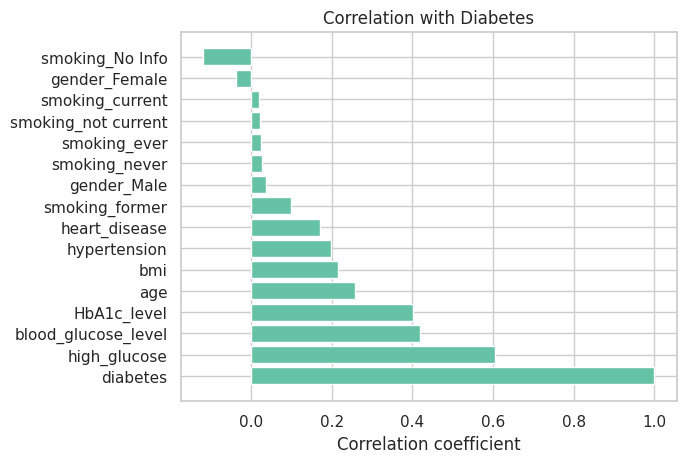

In [237]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Get the correlation of each feature with the target variable 'diabetes'
corr_diabetes = corr_matrix['diabetes']

# Sort the correlation values in descending order
corr_diabetes_sorted = corr_diabetes.sort_values(ascending=False)

# Plot horizontal bar graph of the correlation values
plt.barh(corr_diabetes_sorted.index, corr_diabetes_sorted.values)
plt.title('Correlation with Diabetes')
plt.xlabel('Correlation coefficient')
plt.show()


### Feature Selection 

<font color ='red'>**Target variable y**</font>: Diabetes

<font color ='red'>**Features X**</font>: HbA1c_level	, blood_glucose_level, bmi, age and hypertension 

In [239]:
data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_category,hbca_class,high_glucose,gender_Female,gender_Male,smoking_No Info,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current
0,80.0,0,1,25.19,6.6,140,0,Overweight,6-7,0,1,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,Overweight,6-7,0,1,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,Overweight,5-6,0,0,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,Normal weight,<5,0,1,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,Normal weight,<5,0,0,1,0,1,0,0,0,0


In [241]:
X = data[['HbA1c_level', 'blood_glucose_level', 'bmi', 'age', 'hypertension']]
y = data['diabetes']

In [244]:
X.head()

,HbA1c_level,blood_glucose_level,bmi,age,hypertension
0,6.6,140,25.19,80.0,0
1,6.6,80,27.32,54.0,0
2,5.7,158,27.32,28.0,0
3,5.0,155,23.45,36.0,0
4,4.8,155,20.14,76.0,1


In [245]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

#### Splitting the data into train, validation and test set 

In [249]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)


In [250]:
print("Number of samples in train set: ", len(X_train))
print("Number of samples in validation set: ", len(X_val))
print("Number of samples in test set: ", len(X_test))

Number of samples in train set:  59988
Number of samples in validation set:  19997
Number of samples in test set:  19997


### Scaling the data 

In [252]:
# Instantiate a StandardScaler object
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the fitted scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [253]:
# Saving the scaler 
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

### Creating the Logistic Regression Model 

In [255]:
# Instantiate the logistic regression model
lr_model = LogisticRegression()

# Train the model on the training set
lr_model.fit(X_train_scaled, y_train)


LogisticRegression()

In [256]:
# Make predictions on the validation set
y_pred_val = lr_model.predict(X_val_scaled)

In [257]:
# Evaluate the model on the validation set
accuracy = accuracy_score(y_val, y_pred_val)
print("Accuracy:", accuracy)

Accuracy: 0.9606440966144921


An accuracy of 96.06% means that the logistic regression model was able to correctly predict the diabetes status of 96.06% of the instances in the test set. It indicates that the model is performing well and can be used for predicting the diabetes status of new, unseen instances with a high degree of accuracy.

In [258]:
#saving the model
with open('lr_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

In [264]:
# Example input
new_data = [[6.6, 140, 25.19, 80.0, 0],
            [6.6, 80, 27.32, 54.0, 0],
            [5.0, 155, 23.45, 36.0, 0]]

# Scale the input data
new_data_scaled = scaler.transform(new_data)

# Make predictions
predictions = lr_model.predict(new_data_scaled)
probabilities = lr_model.predict_proba(new_data_scaled)

# Display results
for i in range(len(predictions)):
    if predictions[i] == 0:
        print(f"Patient {i+1}: You don't have diabetes")
    else:
        print(f"Patient {i+1}: You have diabetes")
    print(f"Probability of having diabetes: {probabilities[i][1]*100:.2f}%")


Patient 1: You don't have diabetes
Probability of having diabetes: 24.94%
Patient 2: You don't have diabetes
Probability of having diabetes: 1.58%
Patient 3: You don't have diabetes
Probability of having diabetes: 0.14%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

